# Initialize Project

In [7]:
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
import scipy.interpolate 

# Load datasets
train_df = pd.read_csv('train.csv')
stores_df = pd.read_csv('stores.csv')
oil_df = pd.read_csv('oil.csv')
holidays_df = pd.read_csv('holidays_events.csv')
transactions_df = pd.read_csv('transactions.csv')



# merge datasets on date
# train_df = train_df.merge(transactions_df, on=['date', 'store_nbr'], how='left')
# train_df = train_df.merge(holidays_df, on=['date'], how='left')
# train_df = train_df.merge(oil_df, on=['date'], how='left')
# train_df = train_df.merge(stores_df, on=['store_nbr'], how='left')

train_df['date'] = pd.to_datetime(train_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
oil_df.set_index('date', inplace=True)




# 1. Data Exploration

## a. Explore The Dataset

### Explore training dataset

In [120]:
# Display the first 5 rows as well as 5 random rows of the dataset
# style pretty
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [28]:
# describe the data
train_df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [29]:
# display the data types for each column
train_df.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

## b. Identify missing values, outliers, and unique values in categorical columns

#### missing values:

In [30]:
# find missing values in data
missing_values = {
    'holidays_events.csv': holidays_df.isnull().sum(),
    'stores.csv': stores_df.isnull().sum(),
    'oil.csv': oil_df.isnull().sum(),
    'transactions.csv': transactions_df.isnull().sum()
}

In [31]:
print(tabulate(missing_values, headers='keys', tablefmt='fancy_grid'))

╒═══════════════════════╤══════════════╤═══════════╤════════════════════╕
│   holidays_events.csv │   stores.csv │   oil.csv │   transactions.csv │
╞═══════════════════════╪══════════════╪═══════════╪════════════════════╡
│                     0 │            0 │         0 │                  0 │
├───────────────────────┼──────────────┼───────────┼────────────────────┤
│                     0 │            0 │        43 │                  0 │
├───────────────────────┼──────────────┼───────────┼────────────────────┤
│                     0 │            0 │           │                  0 │
├───────────────────────┼──────────────┼───────────┼────────────────────┤
│                     0 │            0 │           │                    │
├───────────────────────┼──────────────┼───────────┼────────────────────┤
│                     0 │            0 │           │                    │
├───────────────────────┼──────────────┼───────────┼────────────────────┤
│                     0 │             

In [111]:
# we can see that oil.csv has missing values:
missing_values['oil.csv']

date           0
dcoilwtico    43
dtype: int64

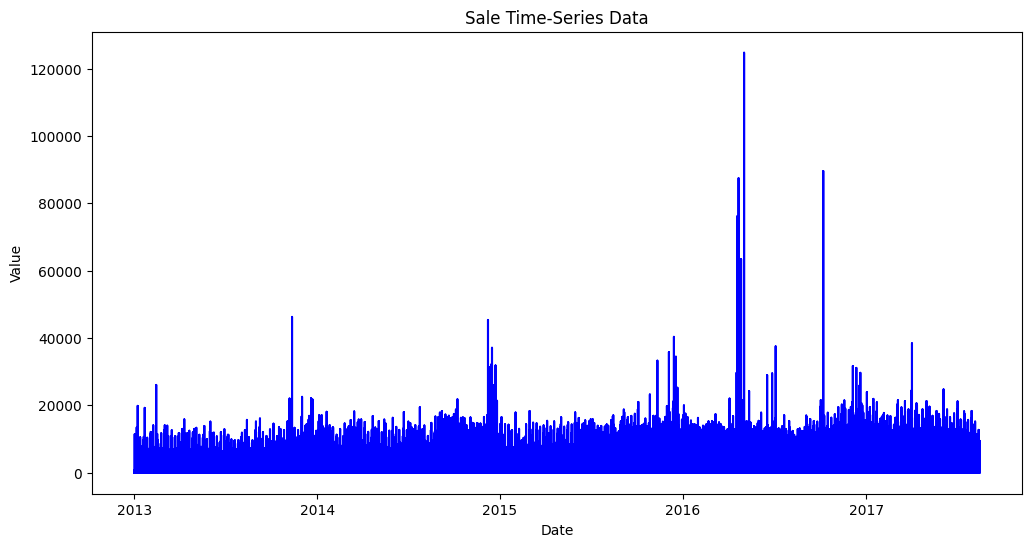

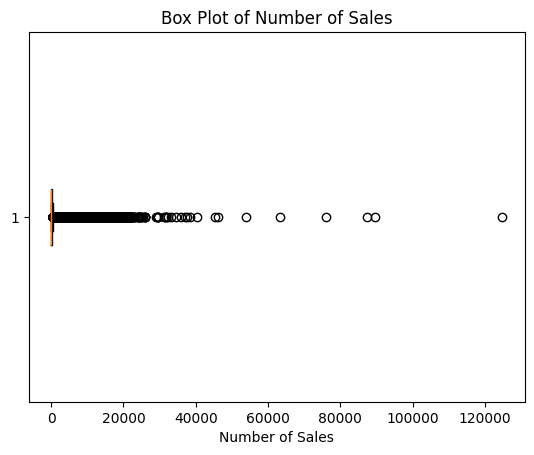

In [54]:
# Using a lineplot and boxplot, we can clearly see the outliers in the data - marked by the high value
# Simple Line Plot
plt.figure(figsize=(12, 6))
plt.plot(train_df['date'], train_df['sales'], color='blue')
plt.title('Sale Time-Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Box Plot
plt.boxplot(train_df['sales'].dropna(), vert=False, showfliers=True)
plt.title('Box Plot of Number of Sales')
plt.xlabel('Number of Sales')
plt.show()


# 2. Data Cleaning

## Handling Missing Values


We know already that oil.csv have missing values and we cannot ignore the values, since the dataset is small. Therefore we should use interpolation or forward fill. Interpolation might be more accurate since it follows trends better. 

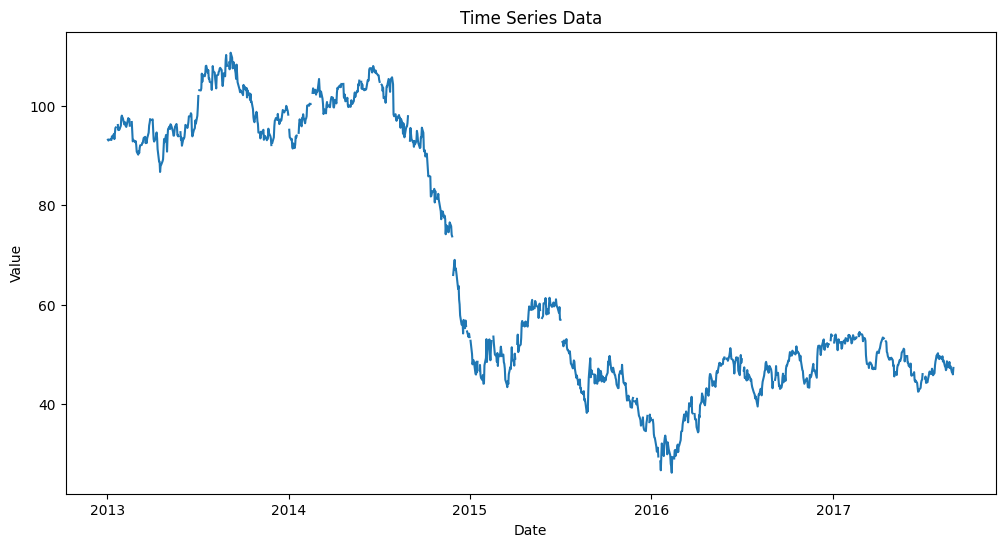

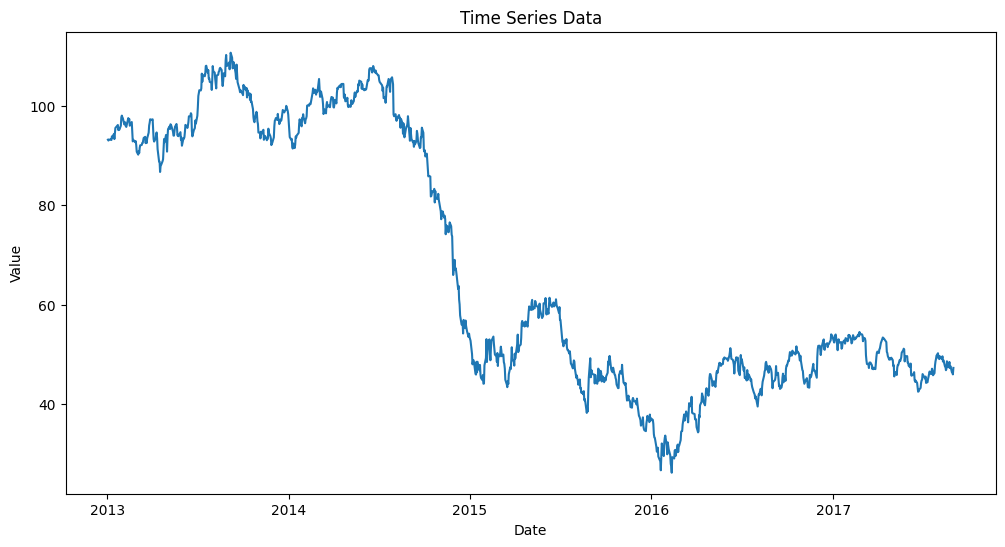

dcoilwtico    1
dtype: int64


In [8]:

plt.figure(figsize=(12, 6))
plt.plot(oil_df.index, oil_df['dcoilwtico'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

oil_df['dcoilwtico'] = oil_df['dcoilwtico'].interpolate(method='time')
plt.figure(figsize=(12, 6))
plt.plot(oil_df.index, oil_df['dcoilwtico'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()
print(oil_df.isnull().sum())




# 3. Handling Outliers

## Z-score
This is not a good fit because the trends and seasons in the dataset makes some values differ a lot from the mean.